In [79]:
#DB Connection 
import pymssql
import pandas as pd
import pyodbc
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=Martin-PC\SQLEXPRESS;"
                     "Database=FootballData;"
                     "Trusted_Connection=yes;")
#conn = pymssql.connect(server="localhost", user="",password="", port=63642)  # You can lookup the port number inside SQL server. 



In [94]:
#Matches select
stmt = """SELECT  Teams.FullName, Teams2.FullName, Teams.Id
	  ,[Matches].ExternalId as MatchId
      ,[Date]
      ,[Country]
      ,[League]
      ,[Season]
      ,[Stage]
      ,[Player_Id]
      ,[AwayTeam_Id]
      ,[HomeTeam_Id]
FROM  [FootballData].[dbo].[Matches]
LEFT JOIN [Teams] ON Matches.HomeTeam_Id = Teams.Id
LEFT JOIN [Teams] as Teams2 ON Matches.AwayTeam_Id = Teams2.Id"""
# Excute Query here
df_matches = pd.read_sql(stmt,conn)
print(df_matches.shape)
df_matches.head(2)

(5700, 12)


,FullName,FullName,Id,MatchId,Date,Country,League,Season,Stage,Player_Id,AwayTeam_Id,HomeTeam_Id
0,Leicester,Chelsea,22,1724244,2015-05-02 07:45:00,England,Premier League,2014/2015,27,None,21,22
1,Arsenal,Sunderland,24,1724302,2015-05-20 14:45:00,England,Premier League,2014/2015,33,None,23,24


In [83]:
#Corners select
stmt = "SELECT * FROM Corners"
# Excute Query here
df_corners = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_corners.shape)
df_corners.head(2)

(73909, 6)


,Id,ExternalId,MatchId,Minute,Player1,TeamId
0,1,3652595,1723983,5,30613,8455
1,2,3649357,1723985,9,30618,8650


In [85]:
#Goals select
stmt = "SELECT * FROM Goals"
# Excute Query here
df_goals = pd.read_sql(stmt,conn)
print(df_goals.shape)
df_goals.head(2)

(21028, 8)


,Id,MatchId,ExternalId,Minute,ScorerId,AssistId,Type,TeamId
0,1,1723983,3652629,14,37240,24372,shot,8191
1,2,1723982,3647567,35,26777,35345,header,9826


In [86]:
#Teams select
stmt = "SELECT DISTINCT * FROM Teams"
# Excute Query here
df_teams = pd.read_sql(stmt,conn)
print(df_teams.shape)
df_teams.head(2)
#df_teams.count

(11535, 4)


,Id,ExternalId,FullName,Acronym
0,1,8191,Burnley,BUR
1,2,8650,Liverpool,LIV


(1249, 3)
10003


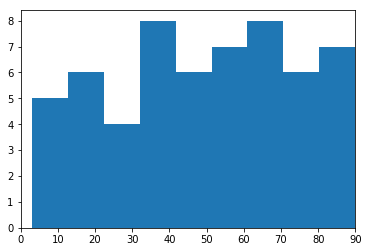

10194


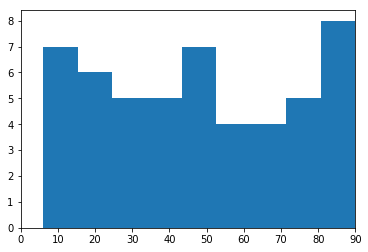

10204


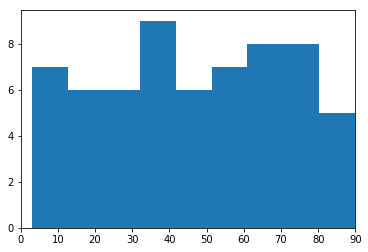

10260


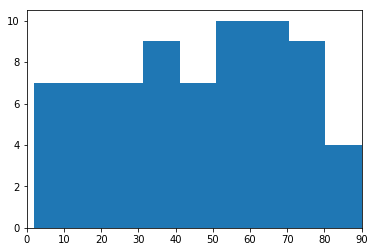

10261


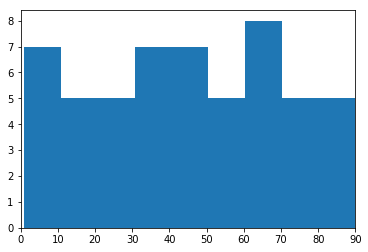

8191


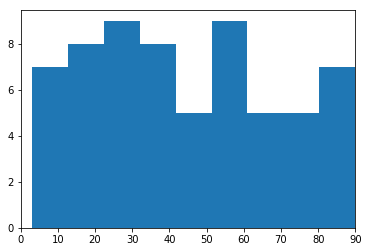

8197


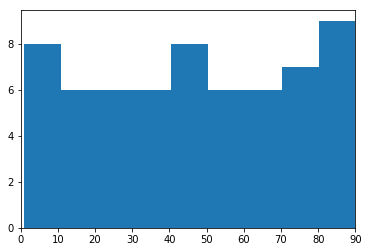

8455


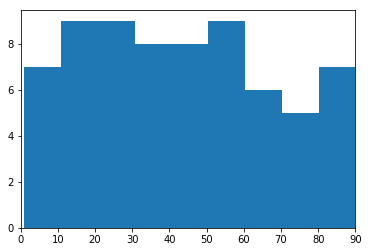

8456


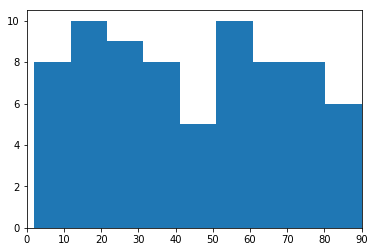

8466


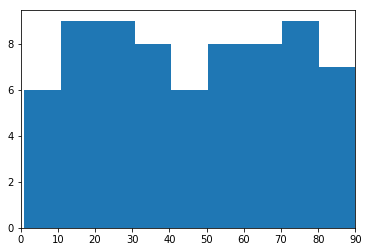

8586


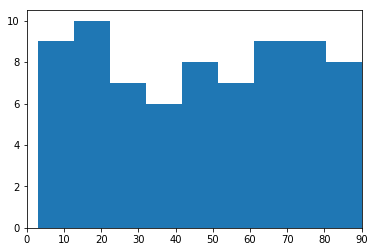

8650


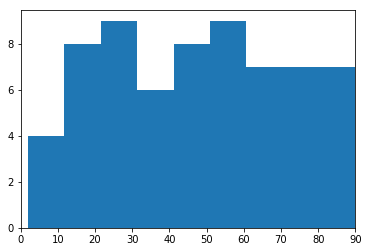

8654


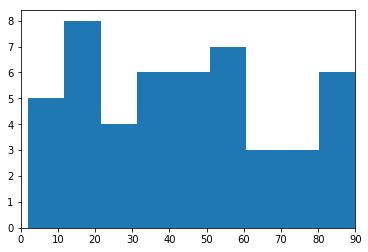

8659


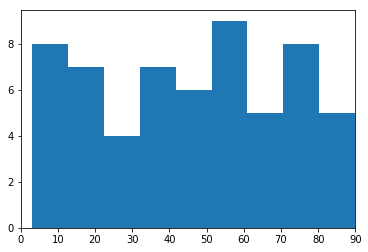

8668


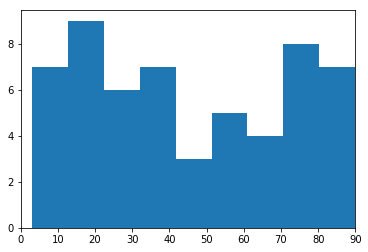

8678


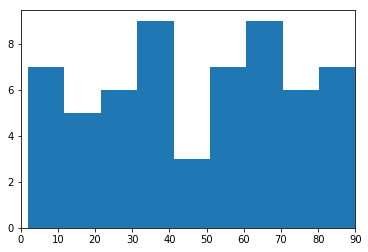

9796


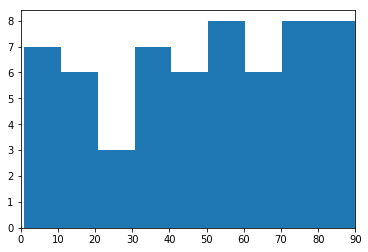

9817


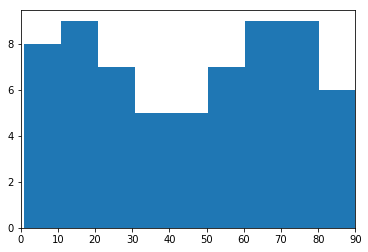

9825


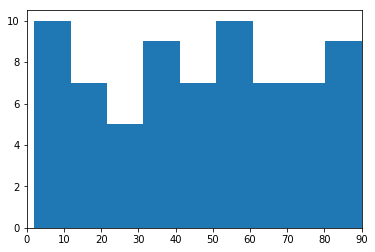

9826


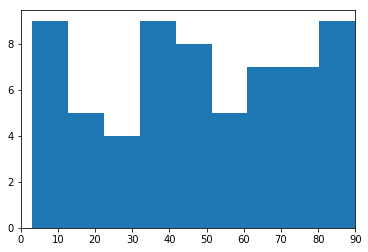

In [16]:
#Teams select
stmt = """SELECT  TeamId, convert (bigint, minute  ) as Minute, count(*) as count
  FROM [FootballData].[dbo].[Corners]
  group by convert (bigint, minute  ),TeamId
  order by 1,2"""
# Excute Query here
df_teams_corners_per_minute = pd.read_sql(stmt,conn)
print(df_teams_corners_per_minute.shape)
#df_teams_corners_per_minute.head()
groups = df_teams_corners_per_minute.groupby(['TeamId'])
df_teams_corners_per_minute.describe()
import matplotlib.pyplot as plt
for group in groups:
    #figure()
    #plt.
    print(group[1].TeamId.values[0])
    plt.hist(group[1].Minute, bins=9)
    #cumulative=1, density=True, histtype='step'
    axes = plt.gca()
    axes.set_xlim([0,90])
    #axes.set_ylim([0,50])
    plt.show()
   
#hist = df_teams_corners_per_minute.hist(by='Minute')
##
#df_teams_corners_per_minute['Minute'].hist(by=df_teams_corners_per_minute['count'])
  

#for group in df_teams_corners_per_minute.groupby(['TeamId']).groups:

# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.pyplot as plt
# df_teams_corners_per_minute.plot.hist()
# plt.show()
# plt.hist(df_teams_corners_per_minute, bins='auto')  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")
# plt.show()
# for team in df_teams_corners_per_minute.groupby(['TeamId']).groups.values:
#     team.hist()

In [24]:
#hist = df_corners.groupby(['Minute','TeamId']).head(10).hist(color='k', alpha=0.5, bins=3)
#not working

In [75]:
goals = pd.merge(df_matches.set_index("ExternalId"), df_goals.set_index("MatchId"),  how='left')
#result = goals[goals['Minute'].notnull()]
print(goals.shape)
premier_league = goals[(goals['League'] == 'Premier League') & (goals['Season'] == '2016/2017')]
premier_league.head()

premier_league['Minute'] = premier_league['Minute'].astype(int)
#premier_league.loc[premier_league['Minute']] = premier_league['Minute'].astype(int)

for number in range(0, 90, 10):
    from_minute = number
    to_minute = number + 10
    goals_by_minute = premier_league.groupby(['TeamId'])['Minute'].apply(
        lambda x: len(x.where(
            lambda y : y > from_minute).where(lambda z:z < to_minute).dropna()))   
    #print(goals)
    #with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
       # print(goals)
#goals_teams = goa
#len(teams.groups)
premier_league.head(2)

(226, 15)


,Id,Date,Country,League,Season,Stage,Player_Id,AwayTeam_Id,HomeTeam_Id,ExternalId,Minute,ScorerId,AssistId,Type,TeamId


In [90]:
result = pd.merge(df_matches.set_index("ExternalId"), df_corners.set_index("MatchId"),  how='left')
#premier_league = result[(result['Season']  == '2017/2018') & (result['League']  == 'Premier League')]
premier_league = result[ (result['Season'] == '2017/2018') & (result['League'] == 'Ligue 1')]
#print(result.shape)


teams_coreners = df_corners.groupby('TeamId')
goal_matches = pd.merge(df_corners.set_index("MatchId"), df_matches.set_index("ExternalId"), how='right')

#goal_matches_home_team = pd.merge(goal_matches.set_index("HomeTeam_Id"), df_teams.set_index("ExternalId"), how='left')
#goal_matches_home_team.rename(columns={'FullName': 'FullNameHome'}, inplace=True)
#goal_matches_home_team.rename(columns={'Acronym': 'AcronymHome'}, inplace=True)
#goal_matches_home_team.rename(columns={'TeamId': 'HomeTeamId'}, inplace=True)
#goal_matches_home_team_away_team = pd.merge(goal_matches_home_team.set_index("AwayTeam_Id"), df_teams.set_index("ExternalId"), how='left')
#goal_matches_home_team_away_team
#goal_matches_home_team
result.head(2)
#goal_matches_home_team_away_team
#['Minute','TeamId'].apply(
#    lambda x: "{%s}" % ', '.join(x.Minute + ' ' + x.TeamId))
#minutes_sum = result.groupby(['TeamId'], as_index=True)['Minute']hg
#minutes_sum
#['Minute']
#minutes_sum = df_corners.groupby('MatchId')['MatchId', 'TeamId','Minute']
#print(premier_league[:10].head())
#print(result_premier_league_1718)
#premier_league_minutes = premier_league[premier_league['Minute'].notnull()]
#print(premier_league_minutes.shape)
#minutes_sum.first()
#print(list(premier_league_minutes.columns.values))

,Id,Date,Country,League,Season,Stage,Player_Id,AwayTeam_Id,HomeTeam_Id,ExternalId,Minute,Player1,TeamId
0,1,2015-05-02 07:45:00,England,Premier League,2014/2015,27,None,21,22,3652595,5,30613,8455
1,2,2015-05-20 14:45:00,England,Premier League,2014/2015,33,None,23,24,3649357,9,30618,8650


In [88]:
goals = pd.merge( df_matches.set_index("ExternalId"), df_goals.set_index("MatchId"), how='left')
#result = goals[goals['Minute'].notnull()]
print(result.shape)
premier_league = goals[(goals['League'] == 'Premier League') & (goals['Season'] == '2016/2017')]
premier_league.head(2)

#premier_league['Minute'] = premier_league['Minute'].astype(int)
#premier_league.loc[premier_league['Minute']] = premier_league['Minute'].astype(int)

#premier_league['TeamId'].hist(by=premier_league['Minute'])

# for number in range(0, 90, 10):
#     from_minute = number
#     to_minute = number + 10
#     goals = premier_league.groupby(['TeamId'])['Minute'].apply(lambda x: len(x.where(lambda y : y > from_minute).where(lambda z:z < to_minute).dropna()))   
#     print(goals)
# #goals_teams = goa
# #len(teams.groups)

#print(teams.groups.keys())

(5700, 13)


,Id,Date,Country,League,Season,Stage,Player_Id,AwayTeam_Id,HomeTeam_Id,ExternalId,Minute,ScorerId,AssistId,Type,TeamId
431,432,2016-08-15 15:00:00,England,Premier League,2016/2017,1,None,886,887,4153285,45,165823,46509,header,10260
432,433,2016-08-15 15:00:00,England,Premier League,2016/2017,1,None,888,889,4153884,82,30843,None,None,10260


In [ ]:
#groups = df_goals.groupby(['MatchId'])
#groups.groups.keys()
#df_goals.head()
minutes_sum = df_goals.groupby(['MatchId', 'TeamId',], as_index=True, sort=True)['Minute']
#minutes_sum.last()
minutes_sum.first()

#print(minutes_sum.shape)
#df_goals.head(10)
#groups.groups['1709877']
#minutes_sum.groups
#result = minutes_sum.get_group(('1709702','9748'))

In [93]:
def get_last_matches(date, team, x = 10):
    ''' Get the last x matches of a given team. '''
    
    #Filter team matches from matches
    team_matches = df_matches[(df_matches['home_team_api_id'] == team) | (df_matches['away_team_api_id'] == team)]
                           
    #Filter x last matches from team matches
    last_matches = team_matches[team_matches.date < date].sort_values(by = 'date', ascending = False).iloc[0:x,:]
    
    #Return last matches
    return last_matches

get_last_matches("2017-05-09 07:45:00.000", "Arsenal")

KeyError: 'home_team_api_id'